In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
item_categories = pd.read_csv('final_project_data/item_categories.csv')
items = pd.read_csv('final_project_data/items.csv')
transactions = pd.read_csv('final_project_data/sales_train.csv.gz')
shops = pd.read_csv('final_project_data/shops.csv')

In [3]:
test = pd.read_csv('final_project_data/test.csv.gz')
submission_sample = pd.read_csv('final_project_data/sample_submission.csv.gz')

In [4]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [5]:
item_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
item_category_name    84 non-null object
item_category_id      84 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [6]:
item_categories['item_category_id'].nunique()

84

In [7]:
item_categories['item_category_name'].nunique()

84

In [8]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [9]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
item_name           22170 non-null object
item_id             22170 non-null int64
item_category_id    22170 non-null int64
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


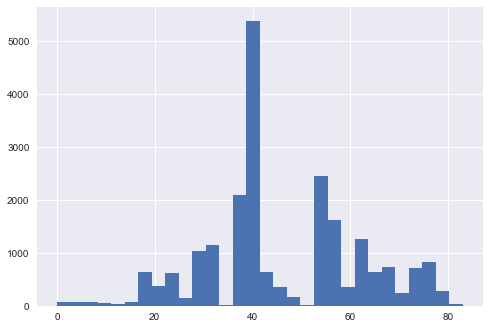

In [10]:
items['item_category_id'].hist(bins = 30)
plt.show()

In [11]:
items['item_id'].nunique()

22170

In [12]:
items['item_category_id'].nunique()

84

In [13]:
items['item_name'].nunique()

22170

In [14]:
item_counts = items.groupby('item_category_id').count()['item_name']

In [15]:
item_counts

item_category_id
0        4
1        2
2       75
3       34
4       15
5       29
6       40
7       24
8        9
9       12
10       1
11      41
12      20
13       6
14      18
15      37
16      20
17       7
18       6
19     628
20     175
21     125
22      79
23     501
24     123
25     140
26       3
27       8
28     240
29      46
      ... 
54      90
55    2365
56     397
57     427
58     790
59     294
60      52
61     598
62     295
63     366
64     290
65     163
66     178
67     394
68      27
69     317
70     228
71       6
72     666
73      36
74       8
75     277
76     333
77     220
78     278
79       1
80       6
81       7
82       8
83      15
Name: item_name, dtype: int64

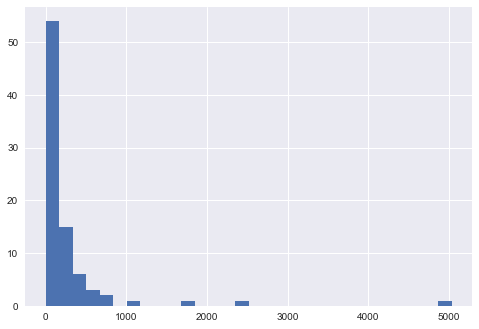

In [16]:
item_counts.hist(bins =  30)
plt.show()

In [17]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [18]:
transactions['date'].max()

'31.12.2014'

In [19]:
transactions['date'].min()

'01.01.2013'

In [20]:
transactions['date'].nunique()

1034

In [21]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [22]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [23]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [24]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [36]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [35]:
items['item_category_id'].unique()

array([40, 76, 55, 19, 30, 23, 37, 41, 57, 43, 78, 54, 49, 44, 45, 77, 73,
       31, 75, 58, 56, 38, 67, 59, 60, 74, 21, 28, 20, 24, 29, 70, 22, 32,
       62, 25, 72,  4, 63, 27, 18, 26, 64, 15, 68,  0,  2,  5,  1,  3,  6,
       35, 65, 14, 13, 10, 11, 12, 48, 71, 69,  7, 33, 34, 16, 66, 39, 52,
       46, 42, 61,  8, 80,  9, 17, 36, 47, 82, 81, 50, 51, 79, 53, 83], dtype=int64)

In [26]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [27]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [28]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [29]:
test['shop_id'].nunique()

42

In [30]:
test['item_id'].nunique()

5100

In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
ID         214200 non-null int64
shop_id    214200 non-null int64
item_id    214200 non-null int64
dtypes: int64(3)
memory usage: 4.9 MB


In [32]:
42*5100

214200

In [33]:
submission_sample.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [37]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [45]:
transactions['revenue'] = transactions['item_price'] * transactions['item_cnt_day']

In [46]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
0,02.01.2013,0,59,22154,999.00,1.0,999.00
1,03.01.2013,0,25,2552,899.00,1.0,899.00
2,05.01.2013,0,25,2552,899.00,-1.0,-899.00
3,06.01.2013,0,25,2554,1709.05,1.0,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,1099.00


In [49]:
shop_item = transactions.groupby(['shop_id', 'item_id'])['revenue'].sum()

In [52]:
shop_item.head()

shop_id  item_id
0        30         8215.0
         31         4774.0
         32         3536.0
         33         2082.0
         35         3705.0
Name: revenue, dtype: float64

In [54]:
shop_item = pd.DataFrame(shop_item)

In [55]:
shop_item.reset_index(level=['shop_id', 'item_id'], inplace=True)

In [56]:
shop_item.head()

,shop_id,item_id,revenue
0,0,30,8215.0
1,0,31,4774.0
2,0,32,3536.0
3,0,33,2082.0
4,0,35,3705.0


In [75]:
shop_item[(shop_item['item_id'] == 30)]

,shop_id,item_id,revenue
0,0,30,8215.00
3602,1,30,2650.00
6124,2,30,1096.00
10974,3,30,6560.00
16236,4,30,4389.00
23544,5,30,6161.00
30629,6,30,18189.00
42485,7,30,6337.00
50728,8,30,2793.00
54042,10,30,2385.00


In [82]:
shop_item['item_id'].nunique()

21807

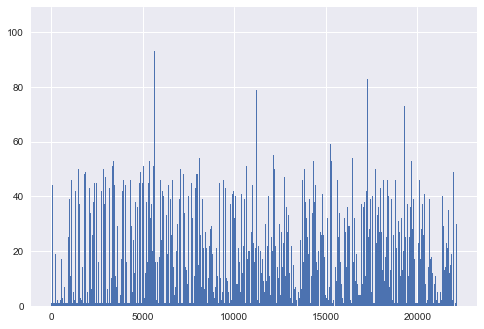

In [83]:
shop_item['item_id'].hist(bins = 21807)
plt.show()

In [85]:
shop_item.head(10)

,shop_id,item_id,revenue
0,0,30,8215.0
1,0,31,4774.0
2,0,32,3536.0
3,0,33,2082.0
4,0,35,3705.0
5,0,36,357.0
6,0,40,127.0
7,0,42,127.0
8,0,43,221.0
9,0,49,254.0


In [86]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [87]:
items_cat = items[['item_id', 'item_category_id']]

In [89]:
items_cat.head()

,item_id,item_category_id
0,0,40
1,1,76
2,2,40
3,3,40
4,4,40


# First OLS baseline

In [91]:
from sklearn import linear_model

In [92]:
OLS_reg = linear_model.LinearRegression()

In [93]:
transactions.groupby(['shop_id', 'item_id'])['revenue'].sum()

shop_id  item_id
0        30          8215.00
         31          4774.00
         32          3536.00
         33          2082.00
         35          3705.00
         36           357.00
         40           127.00
         42           127.00
         43           221.00
         49           254.00
         51           638.00
         57           167.00
         59           110.00
         61           195.00
         75            76.00
         85           190.00
         88            76.00
         95           193.00
         96            70.00
         97            67.00
         98          8040.00
         111          188.00
         115           99.00
         136           89.00
         149          297.00
         151           75.00
         152           97.00
         153          774.00
         198          112.00
         199          116.00
                      ...   
59       22079         98.00
         22087      18468.00
         22088      17362.